In [151]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import regionmask
import geopandas as gp
import pandas as pd
import matplotlib as mpl

In [7]:
data = xr.open_dataset("../data/nsidc_iceage.1984_2020.7daily.nc")

In [74]:
iceage = data.age_of_sea_ice[12,:,:]

In [75]:
lat = data['latitude']
lon = data['longitude']

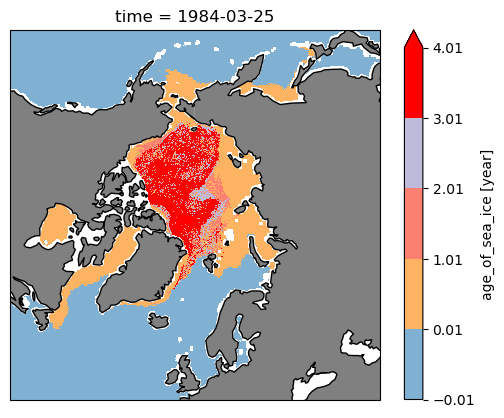

In [76]:
iceage_mask = iceage.where((iceage!=20)&(iceage!=21))

colors = ["white","#80b1d3","#fdb462","#b3de69","#fb8072","#bebada","red"]
boundary = [-0.01,0.01,1.01,2.01,3.01,4.01]
iceage_cm = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(boundaries=boundary, ncolors=iceage_cm.N, extend='both')

proj = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
ax = plt.axes(projection = proj)
ax.coastlines()
ax.add_feature(cfeature.LAND,facecolor="gray")
iceage_mask.plot.pcolormesh(ax=ax, cmap=iceage_cm, norm=norm)

In [224]:
ArcticSea_shapefile = gp.read_file("../data/ArcticSeaShapefile/iho.shp")
BeringSea_shapefile = gp.read_file("../data/BeringSeaShapefile/iho.shp")
OkhotskSea_shapefile = gp.read_file("../data/OkhotskSeaShapefile/iho.shp")
LabradorSea_shapefile = gp.read_file("../data/LabradorSeaShapefile/iho.shp")

In [225]:
Region_shapefile = ArcticSea_shapefile.append(
                                              [BeringSea_shapefile, OkhotskSea_shapefile, LabradorSea_shapefile],
                                              ignore_index=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_10708\3367966721.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Region_shapefile = ArcticSea_shapefile.append(


In [226]:
drop_names = ['Hudson Strait','White Sea','The Northwestern Passages','Norwegian Sea']

Region_shapefile.drop(Region_shapefile[Region_shapefile.name.isin(drop_names)].index, inplace=True)

In [227]:
Region_shapefile.set_index('name', drop=True,inplace=True)

In [228]:
def shapefile_concat(shapefile, concat_index, concat_name):
    '''
    Args:
        shapefile: A GeoPandaDataFrame readed by geopandas
        concat_index: The names of regions needed to be concat, such as ['Davis Strait','Baffin Bay','Labrador Sea']
        concat_name: The name of concatted region in new pdDataFrame, such as 'DavBafLab'
    Return:
        A new GeoPandaDataFrame, which include new row named (concat_name), with the old index used to concat have been dropped.
    '''
    shapefile_old = shapefile.copy()
    shapefile_add = pd.Series(dict(
                                    longitude = shapefile.loc[concat_index,'longitude'].mean(),
                                    latitude  = shapefile.loc[concat_index,'latitude'].mean(),
                                    min_x     = shapefile.loc[concat_index,'min_x'].min(),
                                    min_y     = shapefile.loc[concat_index,'min_y'].min(),
                                    max_x     = shapefile.loc[concat_index,'min_x'].max(),
                                    max_y     = shapefile.loc[concat_index,'min_y'].max(),  
                                    area      = shapefile.loc[concat_index,'area'].sum(),
                                    mrgid     = shapefile.loc[concat_index,'mrgid'].sum(),
                                    geometry  = shapefile.loc[concat_index,:].unary_union),
                                name=concat_name)
    shapefile_new = shapefile_old.append(shapefile_add)
    shapefile_new = shapefile_new.drop(concat_index)
    
    return(shapefile_new)

In [229]:
Region_shapefile.index

Index(['Chukchi Sea', 'Beaufort Sea', 'Davis Strait', 'Baffin Bay',
       'Lincoln Sea', 'East Siberian Sea', 'Hudson Bay', 'Arctic Ocean',
       'Barentsz Sea', 'Greenland Sea', 'Kara Sea', 'Laptev Sea', 'Bering Sea',
       'Sea of Okhotsk', 'Labrador Sea'],
      dtype='object', name='name')

In [230]:
concat_index = ['Davis Strait','Baffin Bay','Labrador Sea']
concat_name = 'DavBafLab'
Region_shapefile = shapefile_concat(Region_shapefile, concat_index=concat_index, concat_name=concat_name)

D:\application\Anaconda\envs\academic\lib\site-packages\pandas\core\dtypes\cast.py:1785: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\dell\AppData\Local\Temp\ipykernel_10708\1995859978.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shapefile_new = shapefile_old.append(shapefile_add)


In [231]:
Region_shapefile.index

Index(['Chukchi Sea', 'Beaufort Sea', 'Lincoln Sea', 'East Siberian Sea',
       'Hudson Bay', 'Arctic Ocean', 'Barentsz Sea', 'Greenland Sea',
       'Kara Sea', 'Laptev Sea', 'Bering Sea', 'Sea of Okhotsk', 'DavBafLab'],
      dtype='object', name='name')

In [232]:
concat_index = ['Arctic Ocean','Lincoln Sea']
concat_name = 'Arctic'
Region_shapefile = shapefile_concat(Region_shapefile, concat_index=concat_index, concat_name=concat_name)

D:\application\Anaconda\envs\academic\lib\site-packages\pandas\core\dtypes\cast.py:1785: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\dell\AppData\Local\Temp\ipykernel_10708\1995859978.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shapefile_new = shapefile_old.append(shapefile_add)


In [233]:
Region_shapefile.index

Index(['Chukchi Sea', 'Beaufort Sea', 'East Siberian Sea', 'Hudson Bay',
       'Barentsz Sea', 'Greenland Sea', 'Kara Sea', 'Laptev Sea', 'Bering Sea',
       'Sea of Okhotsk', 'DavBafLab', 'Arctic'],
      dtype='object', name='name')

<GeoAxesSubplot: >

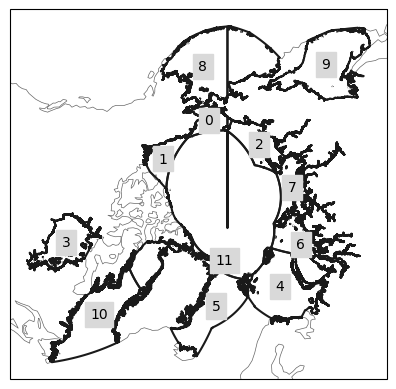

In [234]:
Region_shapefile.reset_index()

proj = ccrs.LambertAzimuthalEqualArea(central_latitude=90)

ax = plt.axes(projection=proj)
regionmask.from_geopandas(Region_shapefile.reset_index(drop=False)).plot()

In [ ]:
proj = ccrsfrom_geopandasambertAzimuthalEqualArea(central_latitude=90)

ax = plt.axes(projection=proj)
ax.add_geometries(Region_shapefile['geometry'],ccrs.PlateCarree())

<GeoAxesSubplot: >

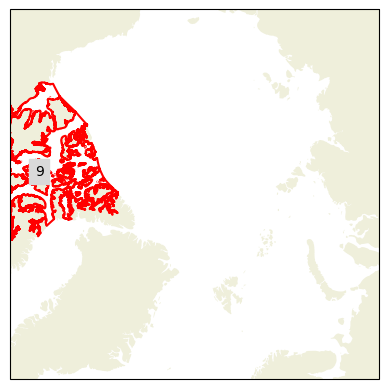

In [80]:

fig = plt.figure()
ax = plt.axes(projection=proj)
ax.set_extent([-180,180,70,80],ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)

Region_mask = regionmask.from_geopandas(Region_shapefile,names='name')
Region_mask[[9]].plot_regions(ax=ax,line_kws=dict(color="red"))

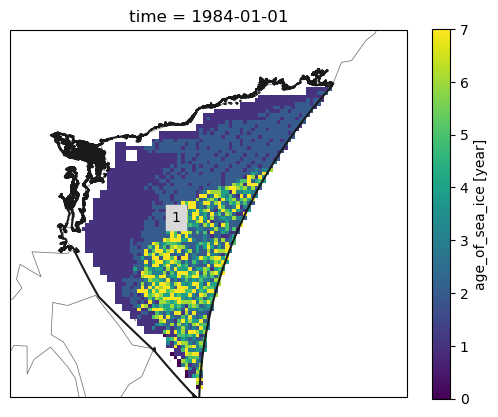

In [56]:
proj = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
ax = plt.axes(projection= proj)
Arctic_region[[1]].plot(ax=ax)

mask = Arctic_region[[1]].mask(lon,lat)
iceage_mask = iceage.where(np.logical_and(mask==1,iceage<=16))

iceage_mask.plot(ax=ax)
ax.set_extent([-160,-120,70,75],crs=ccrs.PlateCarree())
plt.show()

In [51]:
np.logical_and(iceage!=20,iceage!=1)

<xarray.DataArray 'age_of_sea_ice' (y: 722, x: 722)>
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
Coordinates:
  * x        (x) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
  * y        (y) float32 -4.518e+06 -4.506e+06 ... 4.506e+06 4.518e+06
    time     datetime64[ns] 1984-01-01